This notebook illustrates the use of tables in conveying the combination of inferential and computational thinking through studying concepts of probability theory.  It the Birthday Surprise as a running example, based on a lecture by Ani Adhikari in http://data8.org/

In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
# datascience version number of last run of this notebook
version.__version__

'0.3.dev19'

Inferential thinking.  I sit down next to a random person in class, what is the chance that I have the same birthday as that person?

In [2]:
# what is the chance that we have different birthdays?
364/365

0.9972602739726028

In [3]:
# what is the chance that we have the same birdthday?
1 - 364/365

0.002739726027397249

In [4]:
# what is the chance that my birthday is different from both my neighbors?
(364/365) * (363/365)

0.9917958341152187

In [5]:
# the same as one of them?
1 - (364/365) * (363/365)

0.008204165884781345

In [6]:
# the same as one of my four neighbors?
1 - (364/365) * (363/365) * (362/365) * (361/365)

0.02713557369979347

Wow, nearly 3%?

Computational thinking?  For a group of N people, what is the probability that at least two of them have the same birthday?  An algorithmic question.  Given K people with different birthdays, what is the probability that the next random person will have a different birthday than any of them?  If we can answer this single step, we have a way to answer the general question?  Yes, it is like induction.  But it is constructive too.  That's an algorithm.

Let's create a little table, kind of like what might think of as a spreadsheet, to collect all of our computational and inferential thoughts about solving this problem.

In [7]:
bday = Table()

In [8]:
# lets start with numbering the days in the year (we'll start with zero).  We don't care if they are
# in calendar order, backwars, sideways or the ways that we encounter them in meeting random people
bday["day"] = range(365)

In [9]:
bday

day
0
1
2
3
4
5
6
7
8
9


Cool, we have a column of the days, but its pretty long and we can see them all on the page, but a graph is a great way to summarize things, so let's look at what we have.

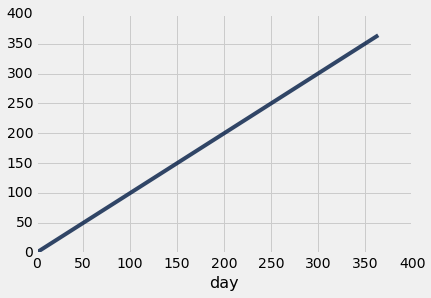

In [10]:
bday.plot()

Yep, as easy as pi.  The days in a year.  But we really need those diminishing fractions of the days left in the year.  OK, that's easy, lets build a new column of the days that are left after we've seen some.  And let's look at what we've got

In [11]:
bday['left']= 364-bday['day']
bday

day,left
0,364
1,363
2,362
3,361
4,360
5,359
6,358
7,357
8,356
9,355


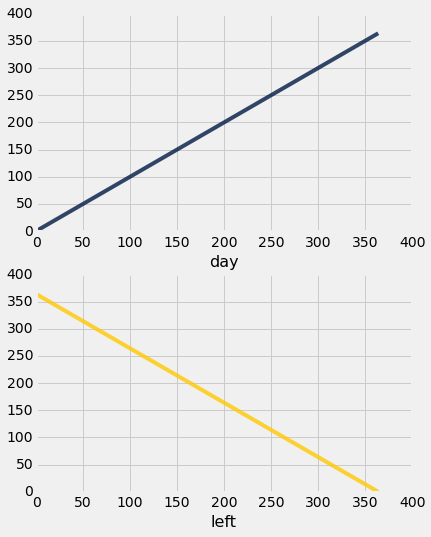

In [12]:
#of course, we could plot these
bday.plot()

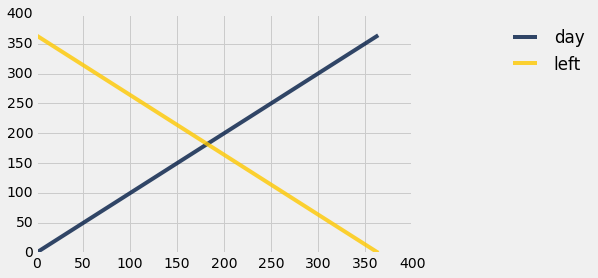

In [13]:
# or on top of each other
bday.plot(overlay=True)

After we have k people with different birthdays, we have 365-k possible days left.  But what we really want is the fraction of days in the year left.  Obviously, divide by the number of days in the year.  Let's do that and see where we are.

In [14]:
bday['frac']=bday['left']/365
bday

day,left,frac
0,364,0.99726
1,363,0.994521
2,362,0.991781
3,361,0.989041
4,360,0.986301
5,359,0.983562
6,358,0.980822
7,357,0.978082
8,356,0.975342
9,355,0.972603


OK, that looks like its going from 1 to 0 just as we'd expect.  And we can see how things are working together, just as we might in a spread sheet.  We can focus on the data that comes out of the computation.  In a spreadsheet this would be all spread around in the cells.  Here the computation is clearly laid out and we can see how it progresses from one step to the next by building up the table. 

We might want to select just 'fraction left' to look at.

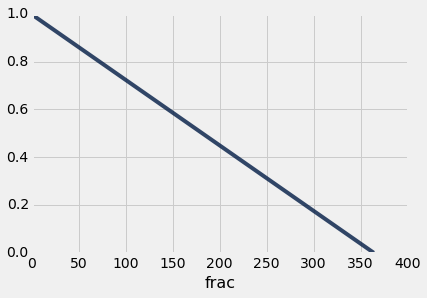

In [15]:
bday.select('frac').plot()

Ah, but remember the inferential part.  Given k people, what is the probability they all have different birthdays.  That's the product of these diminishing fractions.

In [16]:
# each column in our table is really a sequence of values
bday["frac"]

array([ 0.99726027,  0.99452055,  0.99178082,  0.9890411 ,  0.98630137,
        0.98356164,  0.98082192,  0.97808219,  0.97534247,  0.97260274,
        0.96986301,  0.96712329,  0.96438356,  0.96164384,  0.95890411,
        0.95616438,  0.95342466,  0.95068493,  0.94794521,  0.94520548,
        0.94246575,  0.93972603,  0.9369863 ,  0.93424658,  0.93150685,
        0.92876712,  0.9260274 ,  0.92328767,  0.92054795,  0.91780822,
        0.91506849,  0.91232877,  0.90958904,  0.90684932,  0.90410959,
        0.90136986,  0.89863014,  0.89589041,  0.89315068,  0.89041096,
        0.88767123,  0.88493151,  0.88219178,  0.87945205,  0.87671233,
        0.8739726 ,  0.87123288,  0.86849315,  0.86575342,  0.8630137 ,
        0.86027397,  0.85753425,  0.85479452,  0.85205479,  0.84931507,
        0.84657534,  0.84383562,  0.84109589,  0.83835616,  0.83561644,
        0.83287671,  0.83013699,  0.82739726,  0.82465753,  0.82191781,
        0.81917808,  0.81643836,  0.81369863,  0.8109589 ,  0.80

Phew that's a lot of numbers... tables gives us a little peek, but we can always look into it for more.  Sure beats scrolling through 365 rows in excel!

So we need something to take the running product of a bunch of numbers.  These things you'll learn to just build.  But lots of folks built useful ones already.  That's a beautiful thing about computing - you can naturally build on the work of others. Here we'll use the 'cumulative product' tool from the 'numpy' library.  Don't worry you'll see that later.  The important thing it that it does what we did for 2, 3 or 4 neighbors - but for all of them.

In [17]:
bday["different"] = np.cumprod(bday["frac"])
bday

day,left,frac,different
0,364,0.99726,0.99726
1,363,0.994521,0.991796
2,362,0.991781,0.983644
3,361,0.989041,0.972864
4,360,0.986301,0.959538
5,359,0.983562,0.943764
6,358,0.980822,0.925665
7,357,0.978082,0.905376
8,356,0.975342,0.883052
9,355,0.972603,0.858859


In [18]:
# finally the probably that at least two people have the same birthday
bday['some same bday'] = 1-bday['different']
bday

day,left,frac,different,some same bday
0,364,0.99726,0.99726,0.00273973
1,363,0.994521,0.991796,0.00820417
2,362,0.991781,0.983644,0.0163559
3,361,0.989041,0.972864,0.0271356
4,360,0.986301,0.959538,0.0404625
5,359,0.983562,0.943764,0.0562357
6,358,0.980822,0.925665,0.0743353
7,357,0.978082,0.905376,0.0946238
8,356,0.975342,0.883052,0.116948
9,355,0.972603,0.858859,0.141141


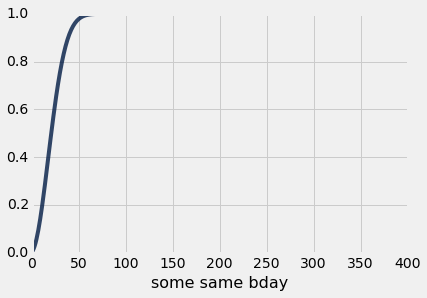

In [19]:
# so 14% with just ten people.  How about the whole story
# Table.select produces a table containing only the selected columns
bday.select('some same bday').plot()

In [20]:
# wow, let's look at the start of that
# Table.take produces a table containing the rows taken from a Table.
bday.take(range(50))

day,left,frac,different,some same bday
0,364,0.99726,0.99726,0.00273973
1,363,0.994521,0.991796,0.00820417
2,362,0.991781,0.983644,0.0163559
3,361,0.989041,0.972864,0.0271356
4,360,0.986301,0.959538,0.0404625
5,359,0.983562,0.943764,0.0562357
6,358,0.980822,0.925665,0.0743353
7,357,0.978082,0.905376,0.0946238
8,356,0.975342,0.883052,0.116948
9,355,0.972603,0.858859,0.141141


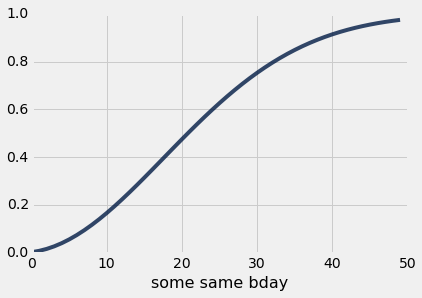

In [21]:
# Table methods generally produce new tables so they compose naturally.
# Here to convey the essence of the Birthday Surprise
bday.take(range(50)).select('some same bday').plot()

In [22]:
# Since indexing a column by its name gives an array, it can be indexed.
bday['some same bday'][20]

0.4756953076625503

Now that we understanding this by building it up step by step, could we put it all into one place that we might call a program for answering this question?  Sure.

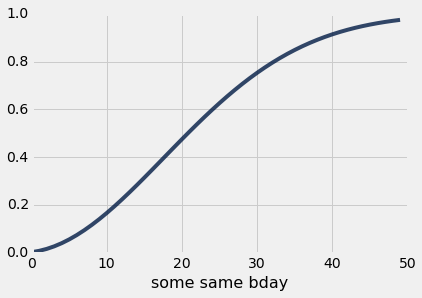

In [23]:
# altogether now like a real program
bd = Table()
bd["day"] = range(365)
bd['left']= 364-bd['day']
bd['frac']=bd['left']/365
bd["different"] = np.cumprod(bd["frac"])
bd['some same bday'] = 1-bd['different']
bd.select('some same bday').take(range(50)).plot()

In [24]:
bd

day,left,frac,different,some same bday
0,364,0.99726,0.99726,0.00273973
1,363,0.994521,0.991796,0.00820417
2,362,0.991781,0.983644,0.0163559
3,361,0.989041,0.972864,0.0271356
4,360,0.986301,0.959538,0.0404625
5,359,0.983562,0.943764,0.0562357
6,358,0.980822,0.925665,0.0743353
7,357,0.978082,0.905376,0.0946238
8,356,0.975342,0.883052,0.116948
9,355,0.972603,0.858859,0.141141
